In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm 

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
cars = pd.read_csv('rachita-cars-processed.csv')
cars = cars.drop('Unnamed: 0', axis=1)
cars.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,33.0,4,91.0,53,1795,17.5,45
1,32.4,4,108.0,75,2350,16.8,39
2,13.0,8,350.0,165,4274,12.0,48
3,33.0,4,91.0,53,1795,17.4,44
4,28.0,4,107.0,86,2464,15.5,44
5,19.9,8,260.0,110,3365,15.5,42
6,22.5,6,232.0,90,3085,17.6,44
7,13.0,8,351.0,158,4363,13.0,47
8,13.0,8,350.0,145,4055,12.0,44
9,17.5,8,305.0,145,3880,12.5,43


In [3]:
cars.shape

(392, 7)

In [4]:
result_dict = {}

In [5]:
# Create helper function to build & train a regression model 

def build_model(regression_function, y_col, x_cols, dataset, test_frac=0.2,\
               preprocess_function=None, show_plot_Y=False, show_plot_scatter=False):
    
    X = dataset[x_cols] # Here x_cols is a List of features we wish to pass
    y = dataset[y_col] # Here y_col is a String that indicates target label 
    
    if preprocess_function is not None: # Specify the preprocessed features if it is not specified as None
        X = preprocess_function(X) 
        
    # Splitting data into train-test (80-20 ratio)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_frac)
    
    model = regression_function(X_train, y_train)
    
    # Predict Y values using unseen test data
    y_pred = model.predict(X_test)
    
    # How does model perform on train data ?
    print("Training score :", model.score(X_train, y_train))
    # How does model perform on test data ?
    print("Test score :", r2_score(y_test,y_pred))
    
    
    # Visualization for actual vs predicted 
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize=(12,10))
        
        plt.plot(y_pred, label='predicted')
        plt.plot(y_test.values, label='actual')
        
        plt.legend()
        plt.show()
        
        
    # Visualization for actual vs predicted  
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize=(12,10))
        
        plt.scatter(X_test, y_test)
        plt.plot(X_test, y_pred, color='m')
        
        plt.legend(['Predicted line','Observed line'])
        plt.show()  

    return {
        'Training score' : model.score(X_train, y_train),
        'Test score' : r2_score(y_test,y_pred)
            }

In [6]:
# Helper function to compare results between different regression models we will build 

def compare_results():
    
    print("Objective : Miles per Gallon (MPG) Prediction \n")
    
    for key in result_dict:
        print('\nRegression Model :', key, '\n')
        print('Training score', result_dict[key]['Training score']) 
        print('Test score', result_dict[key]['Test score'])
            

## Linear Regression

In [7]:
def linear_regression(X_train, y_train):
    model = LinearRegression(normalize=True).fit(X_train, y_train)
    return model

Training score : 0.6800883649205696
Test score : 0.737761056534143


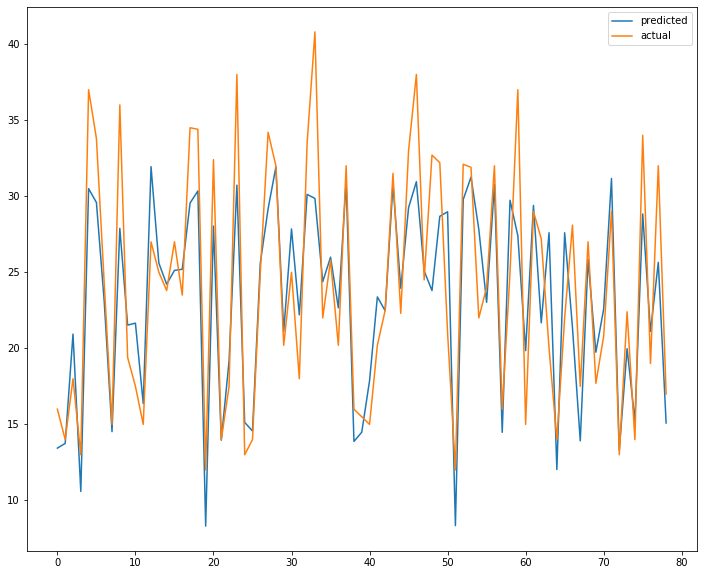

In [8]:
# Passing a single feature

result_dict['mpg ~ Single Linear regression'] = build_model(linear_regression, 
                                                                                'mpg',
                                                                                ['weight'], 
                                                                                cars, 
                                                                                show_plot_Y = True)
#compare_results()

Training score : 0.7096490777341018
Test score : 0.6896245519595217


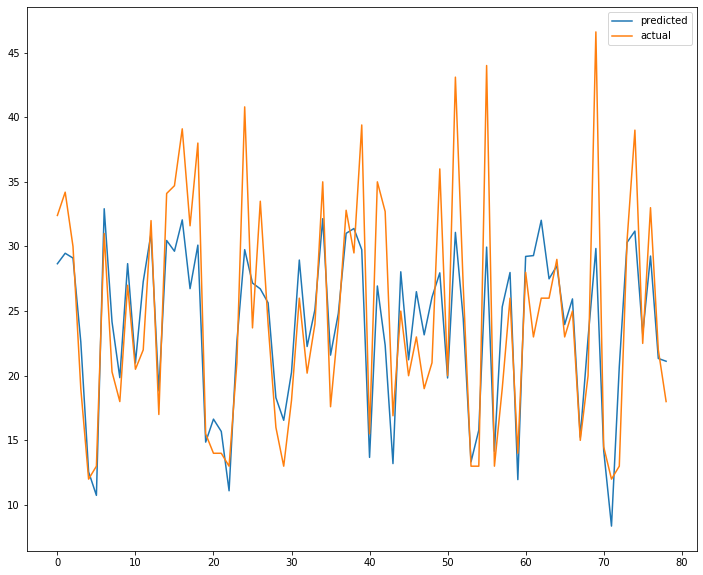

In [9]:
# Passing all the features 

result_dict['mpg ~ kitchen_sink Linear Regression'] = build_model(linear_regression, 
                                                                                'mpg',
                                                                                ['cylinders','displacement','weight',
                                                                                 'horsepower','acceleration'], 
                                                                                cars, 
                                                                                show_plot_Y = True)
#compare_results()

Note that we don't see a lot of improvement using kitchen sink regressor. Let's try to confine ourselves to lesser & more appropriate features.

Training score : 0.7074967526985128
Test score : 0.6935707635482138


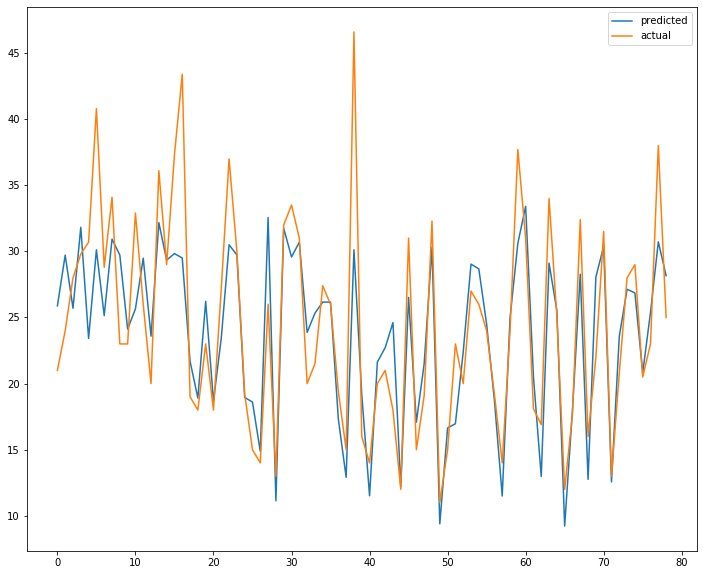

In [10]:
# Passing fewer features 

result_dict['mpg ~ parsimonious Linear Regression'] = build_model(linear_regression, 
                                                                                'mpg',
                                                                                ['weight', 'horsepower'], 
                                                                                cars, 
                                                                                show_plot_Y = True)
#compare_results()

This may not show much difference but if the dataset is really large, it is recommended to use parsimonious features over kitch sink technique to get finer & faster results

## Lasso Regression

Regularization is a technique using which we prevent overfitting of training data & build more robust solutions

In [11]:
def lasso_regression(X_train, y_train, alpha=0.5):
    
    # alpha is the constant term used to multiply the L-1 regularization term
    # Default value of alpha=1
    # Higher value of alpha ~ more regularization
    # If alpha=0 ~ eliminate L1 penalty term ~ defaults to Ordinary Linear Regression
    # For numerical reasons as to how Lasso performs in scikit learn library behind the scene, alpha should not be 0.
    model = Lasso(alpha=alpha).fit(X_train, y_train) 
    
    return model

Training score : 0.7158715633961137
Test score : 0.666027867971561


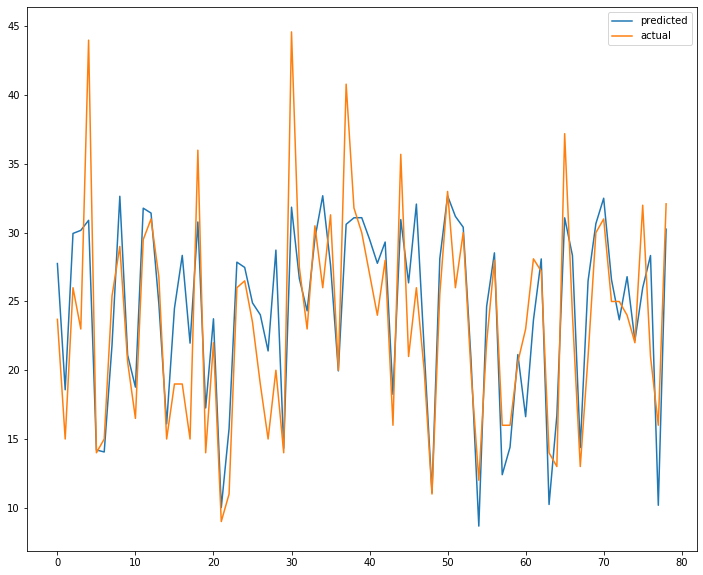

In [12]:
# Passing all the features 

result_dict['mpg ~ kitchen_sink Lasso Regression'] = build_model(lasso_regression, 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

## Ridge Regression

In [13]:
def ridge_regression(X_train, y_train, alpha=0.5, normalize=True):
    model = Ridge(alpha=alpha, normalize=normalize).fit(X_train, y_train) 
    return model

Training score : 0.6835484435545266
Test score : 0.6898791944420909


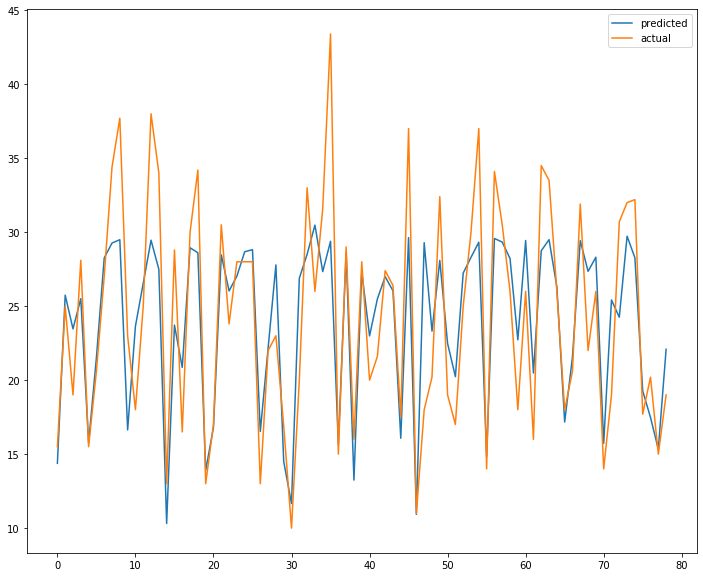

In [14]:
# Passing all the features 

result_dict['mpg ~ kitchen_sink Ridge Regression'] = build_model(ridge_regression, 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

## Elastic Net Regression

In [15]:
# Elastic Net Regression reduces the magnitude of regression coefficients by applying L1 & L2 regularization
# In what combination we want both reg parameters depends on how we tweak certain parameters
# alpha = determines the strength of regularization
# l1_ratio - elastic net mixture parameter. If l1_ratio=0 then it is l2 penalty; if l1_ratio=1 then it is l1 penalty
# If dataset is large always normalize=True. This one is small, thus not much difference
# Most of the times performance is good if max_iter is high. Free to experiment with different values.
# warm_start=True - allows model to reuse the solution of previous call made to fit this model as the initialization
# for next step

def elastic_net_regression(X_train, y_train, alpha=1, l1_ratio=0.5,
                           normalize=False, max_iter=100000, warm_start=True, equivalent_to='Elastic Net'):
    print("Equivalent to :", equivalent_to)
    
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, normalize=normalize,
                      max_iter=max_iter, warm_start=warm_start).fit(X_train, y_train) 
    return model

Equivalent to : OLS
Training score : 0.722679299966789
Test score : 0.6471614602068105


/Users/rachita/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
/Users/rachita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Users/rachita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2608.719330517725, tolerance: 1.8813736805111823
  positive)


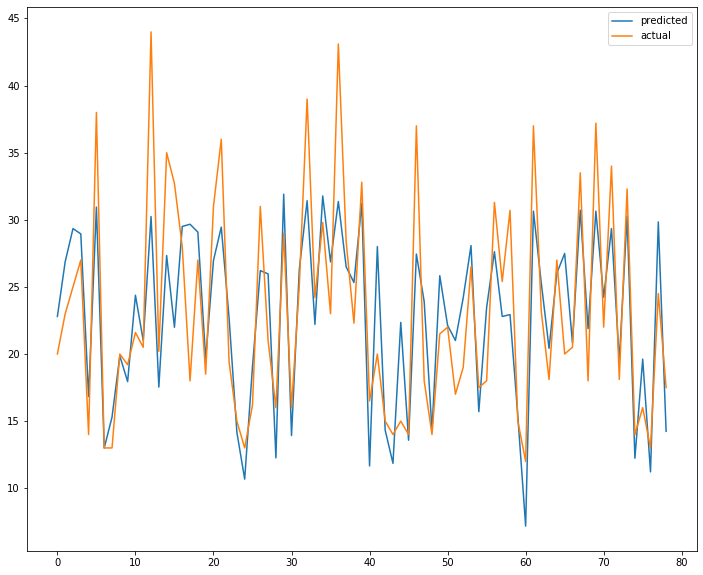

In [16]:
from functools import partial

# Passing all the features 

result_dict['mpg ~ kitchen_sink Elastic Net - OLS'] = build_model(partial(elastic_net_regression, 
                                                                           alpha=0, equivalent_to="OLS"), 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

Equivalent to : Lasso
Training score : 0.7280568880791389
Test score : 0.617891418280383


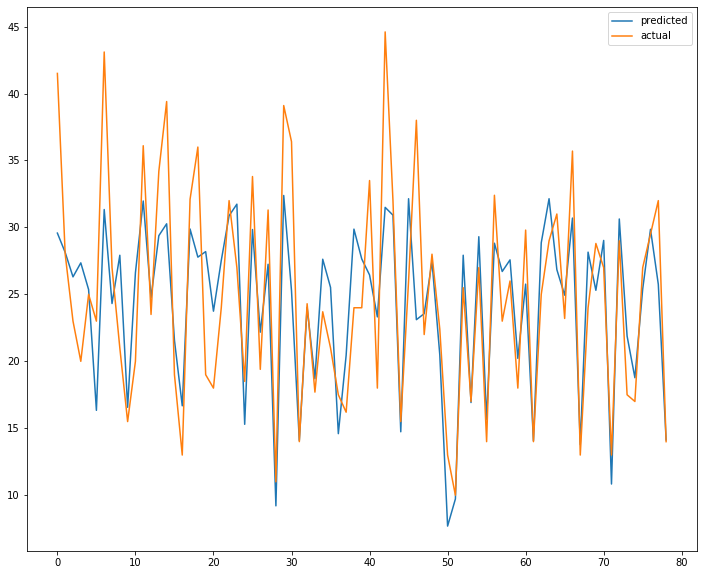

In [17]:
result_dict['mpg ~ kitchen_sink Elastic Net - Lasso'] = build_model(partial(elastic_net_regression, alpha=1,
                                                                           l1_ratio=1, equivalent_to="Lasso"), 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

Equivalent to : Ridge
Training score : 0.691150781077343
Test score : 0.7577451935444164


/Users/rachita/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2899.2731324657116, tolerance: 1.8756187284345047
  positive)


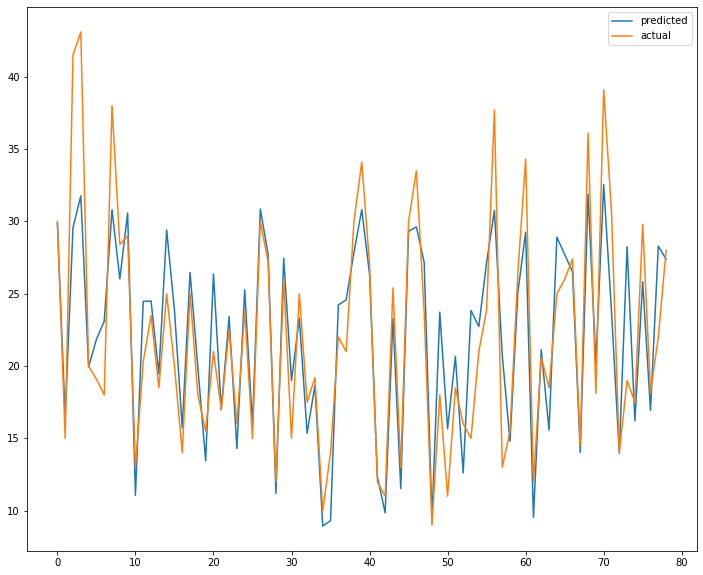

In [18]:
result_dict['mpg ~ kitchen_sink Elastic Net - Ridge'] = build_model(partial(elastic_net_regression, alpha=1,
                                                                           l1_ratio=0, equivalent_to="Ridge"), 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

Equivalent to : Elastic Net
Training score : 0.6980083338378693
Test score : 0.7349313102802375


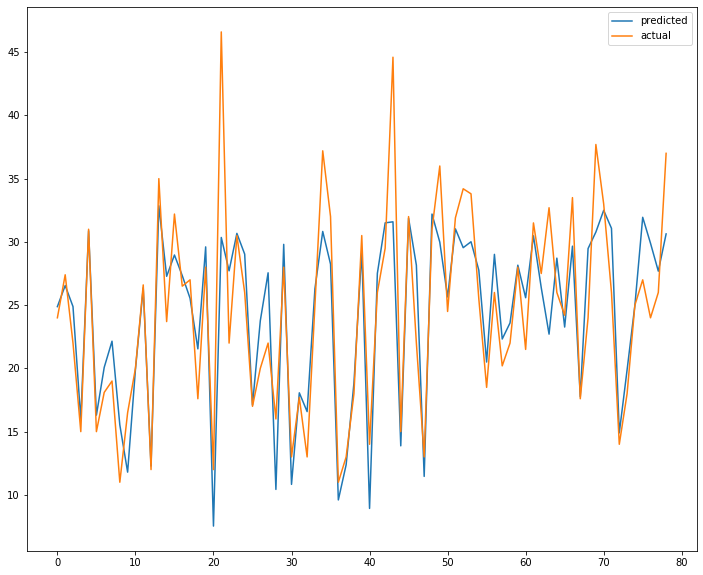

In [19]:
result_dict['mpg ~ kitchen_sink Elastic Net'] = build_model(partial(elastic_net_regression, alpha=1, l1_ratio=0.5), 
                                                                 'mpg',
                                                                 ['cylinders','displacement','weight',
                                                                 'horsepower','acceleration'], 
                                                                  cars, 
                                                                  show_plot_Y = True)
#compare_results()

## Support Vector Machine Regression 

In [20]:
# Epsilon (e) helps us draw a SVM margin in which as many underlying data points can fit : Margin or Epsilon tube = 2e
# C is the penalty applied to points that lie outside the margin while calculating errors for best fit line
# If C is high ~ high penalty on outliers

def svr_regression(X_train, y_train, kernel='linear', epsilon=0.05, C=0.3):
    model = SVR(kernel=kernel, epsilon=epsilon, C=C).fit(X_train, y_train)
    
    return model

Training score : 0.7020451201434665
Test score : 0.6888844733888737


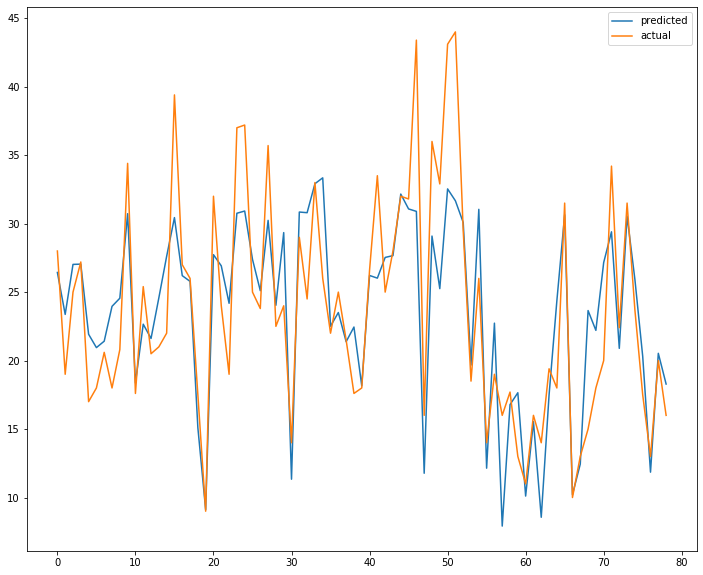

In [21]:
result_dict['mpg ~ kitchen_sink SVR'] = build_model(svr_regression, 'mpg',
                                                    ['cylinders','displacement','weight',
                                                    'horsepower','acceleration'], 
                                                    cars, 
                                                    show_plot_Y = True)
#compare_results()

## Nearest Neighbors Regression : K Nearest Neighbors

In [22]:
def k_neighbors_regression(X_train, y_train, n_neighbors=10):
    model = KNeighborsRegressor(n_neighbors=n_neighbors).fit(X_train, y_train)
    
    return model

Training score : 0.7695932020798295
Test score : 0.6691148644675502


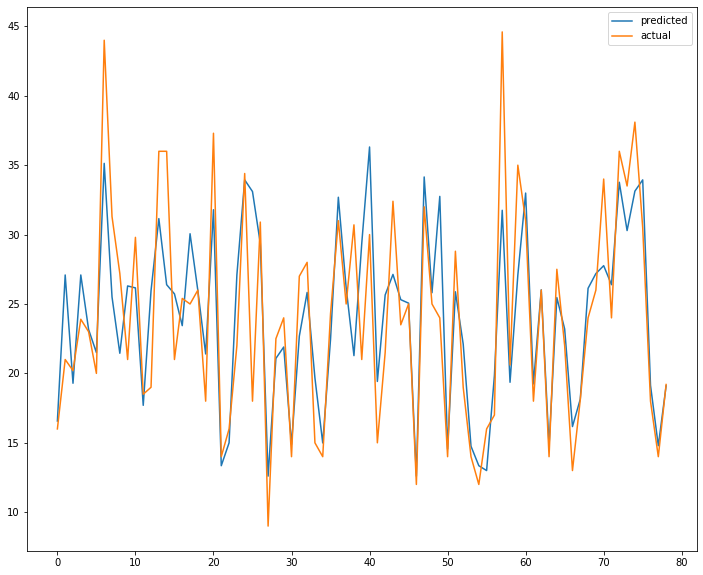

In [23]:
result_dict['mpg ~ kitchen_sink KNN Regression'] = build_model(k_neighbors_regression, 'mpg',
                                                    ['cylinders','displacement','weight',
                                                    'horsepower','acceleration'], 
                                                    cars, 
                                                    show_plot_Y = True)
#compare_results()

## Stochastic Gradient Descent Regression

In [24]:
def apply_standard_scaler(x):
    scaler = StandardScaler().fit(x)
    
    return scaler.transform(x)

In [25]:
def sgd_regressor(X_train, y_train, max_iter = 10000, tol = 1e-3):
    model = SGDRegressor(max_iter=max_iter, tol=tol).fit(X_train, y_train)
    
    return model

Training score : 0.7004691361022918
Test score : 0.7306809974099839


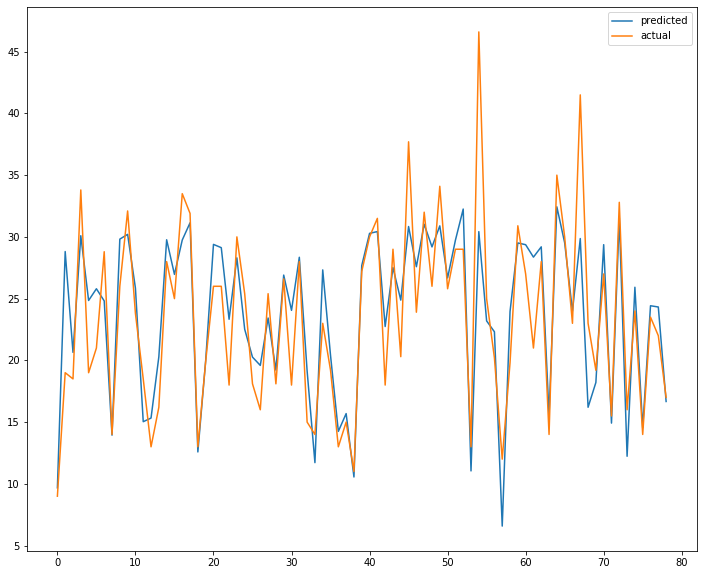

In [26]:
result_dict['mpg ~ kitchen_sink SGD Regression'] = build_model(sgd_regressor, 'mpg',
                                                    ['cylinders','displacement','weight',
                                                    'horsepower','acceleration'], 
                                                    cars, 
                                                    show_plot_Y=True,
                                                    preprocess_function=apply_standard_scaler)
#compare_results()

## Decision Tree Regression

In [27]:
def decision_tree_regression(X_train, y_train, max_depth=2):
    model = DecisionTreeRegressor(max_depth=max_depth).fit(X_train, y_train)
    
    return model

Training score : 0.748282188702016
Test score : 0.6574676669144595


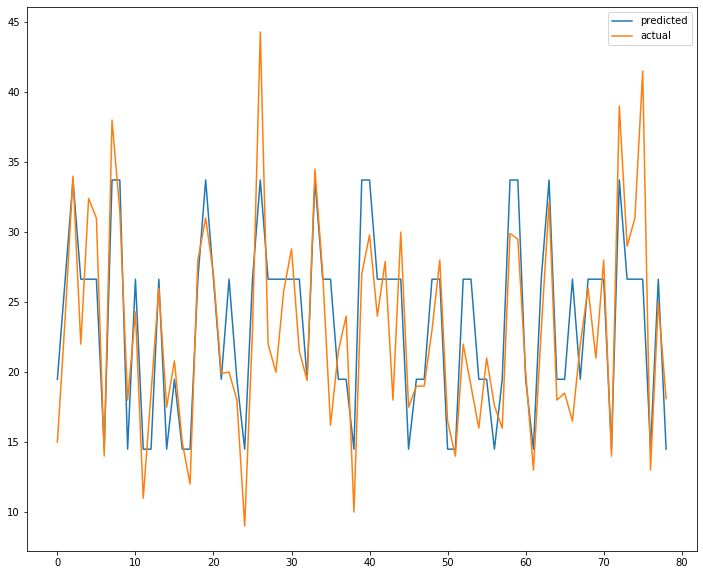

In [28]:
result_dict['mpg ~ kitchen_sink Decision Tree Regressor'] = build_model(decision_tree_regression, 'mpg',
                                                    ['cylinders','displacement','weight',
                                                    'horsepower','acceleration'], 
                                                    cars, 
                                                    show_plot_Y=True)
#compare_results()

## Least Angle Regression

In [29]:
# Typically used for high dimensional data

def lars_regression(X_train, y_train, n_nonzero_coefs=4):
    model = Lars(n_nonzero_coefs=n_nonzero_coefs).fit(X_train, y_train)
    
    return model

Training score : 0.7054778965018782
Test score : 0.7109883541997252


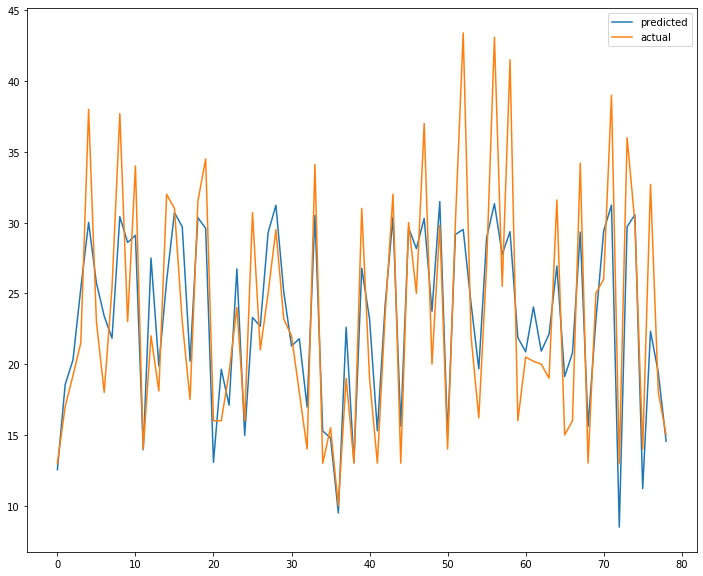

In [30]:
result_dict['mpg ~ kitchen_sink LARS Regression'] = build_model(lars_regression, 'mpg',
                                                    ['cylinders','displacement','weight',
                                                    'horsepower','acceleration'], 
                                                    cars, 
                                                    show_plot_Y=True)
#compare_results()

In [31]:
compare_results()

Objective : Miles per Gallon (MPG) Prediction 


Regression Model : mpg ~ Single Linear regression 

Training score 0.6800883649205696
Test score 0.737761056534143

Regression Model : mpg ~ kitchen_sink Linear Regression 

Training score 0.7096490777341018
Test score 0.6896245519595217

Regression Model : mpg ~ parsimonious Linear Regression 

Training score 0.7074967526985128
Test score 0.6935707635482138

Regression Model : mpg ~ kitchen_sink Lasso Regression 

Training score 0.7158715633961137
Test score 0.666027867971561

Regression Model : mpg ~ kitchen_sink Ridge Regression 

Training score 0.6835484435545266
Test score 0.6898791944420909

Regression Model : mpg ~ kitchen_sink Elastic Net - OLS 

Training score 0.722679299966789
Test score 0.6471614602068105

Regression Model : mpg ~ kitchen_sink Elastic Net - Lasso 

Training score 0.7280568880791389
Test score 0.617891418280383

Regression Model : mpg ~ kitchen_sink Elastic Net - Ridge 

Training score 0.691150781077343
Test sc